In [1]:
from ggplot import *
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

G:\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data = pd.read_pickle("pickle_data/201601.xlsx.pkl")

### TSNE

In [4]:
%time

columns = ['入口站编号', '出口站编号', '车型代码', '里程', '车货总重', '限重', '超限率', '行驶时间']
X = data[columns].sample(frac=0.3, random_state=2020, replace=False)
tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

Wall time: 0 ns
[[-17.709213    19.857592  ]
 [-23.099012   -16.289557  ]
 [ 14.018432    22.333242  ]
 ...
 [  9.007866   -17.787643  ]
 [ 28.87436      0.13583764]
 [-25.832561    20.907597  ]]


In [49]:
from sklearn import preprocessing

X = pd.DataFrame(columns=['x','y'])
X['x'] = tsne.embedding_[:,0]
X['y'] = tsne.embedding_[:,1]
display(X)

,x,y
0,-17.709213,19.857592
1,-23.099012,-16.289557
2,14.018432,22.333242
3,-27.171854,15.851245
4,-25.429707,-40.496948
...,...,...
174498,-6.328938,2.318642
174499,-13.855071,-24.373713
174500,9.007866,-17.787643
174501,28.874359,0.135838


In [50]:
sd = StandardScaler()
sd_X = sd.fit_transform(X)

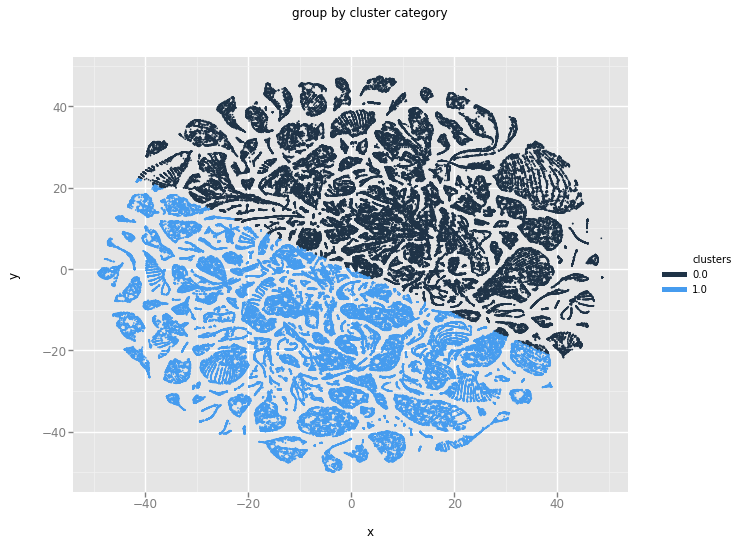

<ggplot: (-9223371932817189164)>

In [51]:
model=KMeans(n_clusters=2,
             init='k-means++',
             tol=0.0001,
             algorithm='auto',
             max_iter=300).fit(sd_X)

Q = model.predict(sd_X)
X['clusters'] = Q
ggplot(X, aes(x='x', y='y', color='clusters')) + geom_point(size=3) + ggtitle("group by cluster category")

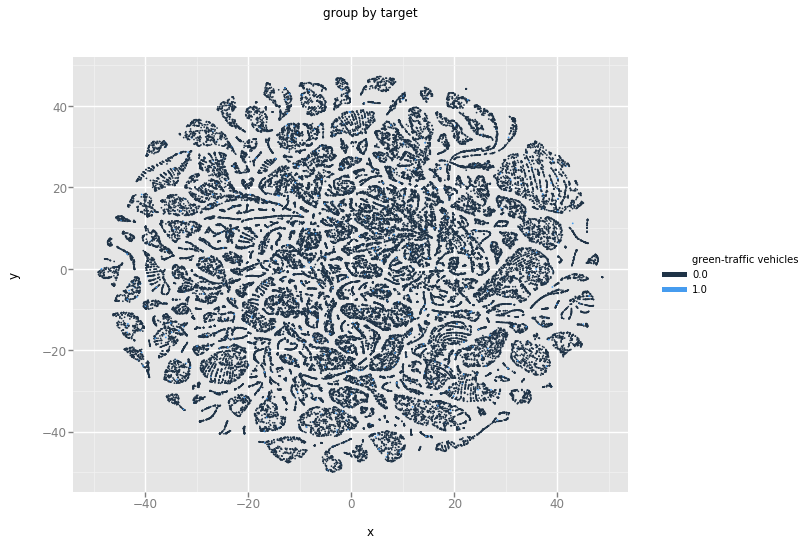

<ggplot: (-9223371932817186636)>

In [52]:
X['green-traffic vehicles'] = data['是否绿色通道车辆代码'].sample(frac=0.3, random_state=2020, replace=False)
ggplot(X, aes(x='x', y='y', color='green-traffic vehicles')) + geom_point(size=3) + ggtitle("group by target")

### PCA

G:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
G:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
G:\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

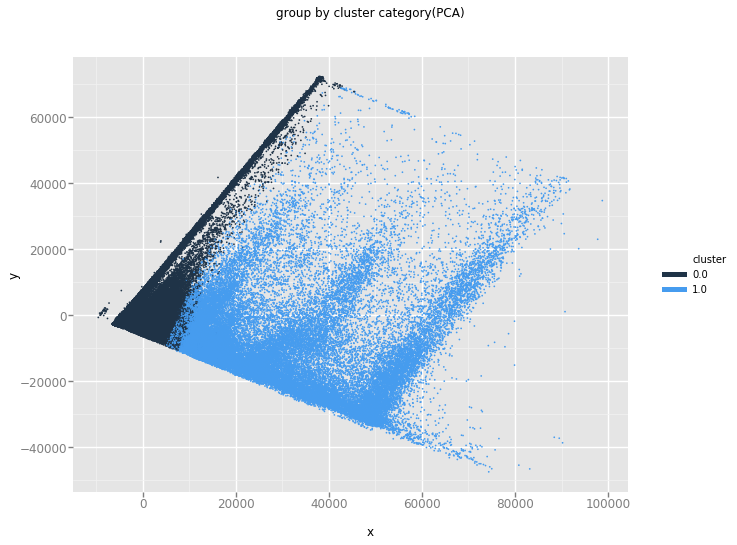

<ggplot: (-9223371901826414368)>

In [5]:
df = pd.read_pickle("pickle_data/201601.xlsx.pkl")
columns = ['入口站编号', '出口站编号', '车型代码', '里程', '车货总重', '限重', '超限率', '行驶时间']
X = df[columns]
pca=PCA(n_components=2)
pca.fit(X)

datapca = pca.transform(X)
X['x'] = datapca[:,0]
X['y'] = datapca[:,1]

DATA = df[columns]
scaler = preprocessing.StandardScaler().fit(DATA)
X_DATA = scaler.transform(DATA)

model=KMeans(n_clusters=2,
             init='k-means++',
             tol=0.0001,
             algorithm='auto',
             max_iter=300).fit(X_DATA)

Q = model.predict(X_DATA)
X['cluster'] = Q
ggplot(X, aes(x='x', y='y', color='cluster')) + geom_point(size=3) + ggtitle("group by cluster category(PCA)")

G:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


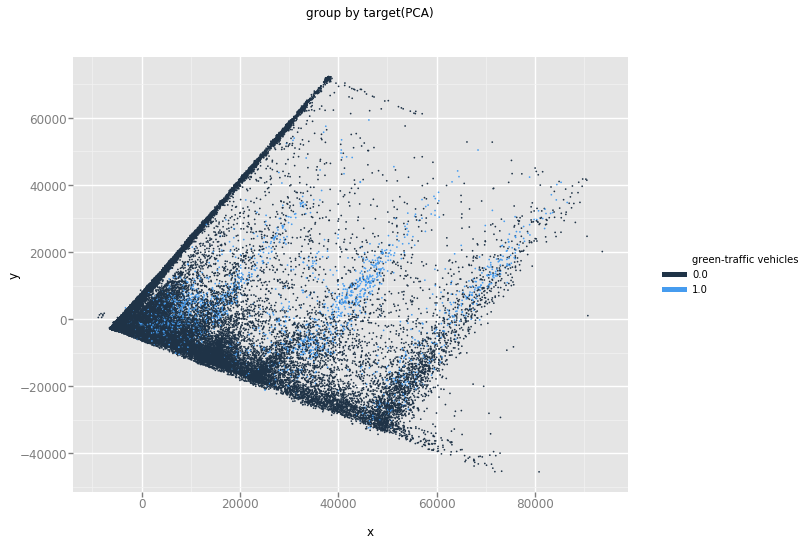

<ggplot: (-9223371901698710132)>

In [6]:
X['green-traffic vehicles'] = df['是否绿色通道车辆代码'].sample(frac=0.3, random_state=2020, replace=False)
ggplot(X, aes(x='x', y='y', color='green-traffic vehicles')) + geom_point(size=3) + ggtitle("group by target(PCA)")

In [8]:
df['cluster'] = Q
outliers = df[df['cluster']==1]
outliers = outliers[outliers['是否绿色通道车辆代码']==1]
display(outliers)

clean = df[df['cluster']==0]
clean = outliers[outliers['是否绿色通道车辆代码']==1]

,Unnamed: 0,入口网络编号,入口站编号,入口日期及时间,出口网络编号,出口站编号,出口日期及时间,出口车道编号,车型代码,车种代码,...,是否绿色通道车辆代码,免费类型代码,路径标识,是否ETC车道代码,ETC车辆电子标签OBU编号,支付方式代码,车牌号,行驶时间,通过车道的平均速度(km/h),cluster
832,832,5201,8974,2016-01-14 03:27:19,5201,20737,2016-01-14 08:43:45,100,14,1,...,1,22,NaN,0,0,2,川R45839,18986,0.964737,1
988,988,5201,20481,2016-01-14 02:12:42,5201,12556,2016-01-14 08:43:27,90,14,1,...,1,22,NaN,0,0,2,豫L54706,23445,1.274580,1
1000,1000,5201,3841,2016-01-14 00:05:14,5201,8974,2016-01-14 08:42:14,85,15,1,...,1,22,NaN,0,0,2,桂K24918,31020,1.209689,1
1029,1029,5201,3073,2016-01-11 14:33:42,5201,3332,2016-01-11 17:42:58,82,12,1,...,1,22,NaN,0,0,2,湘J90268,11356,1.858595,1
1190,1190,5201,3073,2016-01-11 15:56:39,5201,2563,2016-01-11 17:48:54,82,14,1,...,1,22,NaN,0,0,2,豫M90757,6735,1.149292,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580852,580865,5201,14341,2016-01-11 20:27:10,5201,9734,2016-01-12 00:07:42,83,14,1,...,1,22,NaN,0,0,2,贵E19296,13232,0.888020,1
580880,580893,5201,10255,2016-01-11 19:25:09,5201,12801,2016-01-12 00:03:46,83,12,1,...,1,22,NaN,0,0,2,云D03529,16717,1.297259,1
580903,580916,5201,12035,2016-01-11 20:24:56,5201,14341,2016-01-12 00:03:14,91,14,1,...,1,22,NaN,0,0,2,川E07029,13098,1.911649,1
580971,580984,5201,11274,2016-01-11 22:39:05,5201,11265,2016-01-12 00:14:56,89,14,1,...,1,22,NaN,0,0,2,桂K82115,5751,2.224413,1


In [9]:
outliers.to_csv('outliers\Jan.csv',index=False)
clean.to_csv('cleandata\cleanJan.csv',index=False)

In [11]:
def kmeans_group(read_file, outfile):
    df = pd.read_pickle(read_file)
    columns = ['入口站编号', '出口站编号', '车型代码', '里程', '车货总重', '限重', '超限率', '行驶时间']
    X = df[columns]
    pca=PCA(n_components=2)
    pca.fit(X)

    datapca = pca.transform(X)
    X['x'] = datapca[:,0]
    X['y'] = datapca[:,1]

    DATA = df[columns]
    scaler = preprocessing.StandardScaler().fit(DATA)
    X_DATA = scaler.transform(DATA)

    model=KMeans(n_clusters=2,
                 init='k-means++',
                 tol=0.0001,
                 algorithm='auto',
                 max_iter=300, random_state=2020).fit(X_DATA)

    Q = model.predict(X_DATA)
    X['cluster'] = Q
    df['cluster'] = Q
    if len(df[df['cluster']==1]) >= len(df[df['cluster']==0]):
        outliers = df[df['cluster']==0]
        outliers = outliers[outliers['是否绿色通道车辆代码']==1]
        clean = df[df['cluster']==1]
    else:
        outliers = df[df['cluster']==1]
        outliers = outliers[outliers['是否绿色通道车辆代码']==1]
        clean = df[df['cluster']==0]
    
    outliers.to_csv('outliers/'+outfile+'.csv',index=False, encoding='utf-8')
    clean.to_csv('cleandata/'+outfile+'.csv',index=False, encoding='utf-8')


In [12]:
#kmeans_group("pickle_data/201601.xlsx.pkl", "Jan")

In [13]:
#kmeans_group("pickle_data/201603.xlsx.pkl", "March")

In [14]:
#kmeans_group("pickle_data/201604.xlsx.pkl", "April")

In [15]:
#kmeans_group("pickle_data/201605.xlsx.pkl", "May")

In [16]:
kmeans_group("pickle_data/201607.xlsx.pkl", "July")
kmeans_group("pickle_data/201608.xlsx.pkl", "Aug")
kmeans_group("pickle_data/201609.xlsx.pkl", "Sep")
kmeans_group("pickle_data/201610.xlsx.pkl", "Oct")
kmeans_group("pickle_data/201611.xlsx.pkl", "Nov")
kmeans_group("pickle_data/201612.xlsx.pkl", "Dec")

#### What is the vehicle identification number? Vin is the abbreviation of vehicle identification number. Because ASE standard stipulates that VIN code is composed of 17 characters, so it is commonly known as 17 digit code. A set of unique numbers used on a car to identify the manufacturer, engine, chassis serial number and other performance information.

In [37]:
data.columns

Index(['Unnamed: 0', '入口网络编号', '入口站编号', '入口日期及时间', '出口网络编号', '出口站编号',
       '出口日期及时间', '出口车道编号', '车型代码', '车种代码', '里程', '总轴数', '轴型及轴重', '车货总重', '限重',
       '超限率', '是否绿色通道车辆代码', '免费类型代码', '路径标识', '是否ETC车道代码', 'ETC车辆电子标签OBU编号',
       '支付方式代码', '车牌号', '行驶时间', '通过车道的平均速度(km/h)'],
      dtype='object')

In [38]:
renamecolIndex = ['unnamed: 0 ','entry network number', 'entry station number', 'entry date and time', 'exit network number', 'exit station number',
'export date and time', 'exit lane number', 'model code', 'vehicle type code', 'mileage', 'total axle number', 'axle type and axle weight', 'total vehicle and cargo weight', 'weight limit',
'overrun rate', 'green channel vehicle code', 'free type code', 'path identification', 'etc Lane code', 'etc vehicle electronic tag OBU number',
'payment method code', 'license plate number', 'driving time', 'average speed of passing lane (km / h)']

In [39]:
data.columns = renamecolIndex

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581678 entries, 0 to 581677
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   unnamed: 0                              581678 non-null  int64         
 1   entry network number                    581678 non-null  int64         
 2   entry station number                    581678 non-null  int64         
 3   entry date and time                     581678 non-null  datetime64[ns]
 4   exit network number                     581678 non-null  int64         
 5   exit station number                     581678 non-null  int64         
 6   export date and time                    581678 non-null  datetime64[ns]
 7   exit lane number                        581678 non-null  int64         
 8   model code                              581678 non-null  int64         
 9   vehicle type code                    

In [41]:
data.describe()

,unnamed: 0,entry network number,entry station number,exit network number,exit station number,exit lane number,model code,vehicle type code,mileage,total axle number,...,weight limit,overrun rate,green channel vehicle code,free type code,path identification,etc Lane code,etc vehicle electronic tag OBU number,payment method code,driving time,average speed of passing lane (km / h)
count,581678.000000,581678.0,581678.000000,581678.0,581678.000000,581678.000000,581678.000000,581678.000000,581678.000000,581678.000000,...,581678.000000,581678.000000,581678.000000,581678.000000,0.0,581678.0,581678.0,581678.000000,581678.000000,581678.000000
mean,290846.107345,5201.0,10282.487854,5201.0,10452.124428,84.537677,3.742394,0.241457,98.282568,2.176281,...,15946.635424,-79.230262,0.015949,0.446766,NaN,0.0,0.0,0.060405,4674.185156,1.668598
std,167919.377328,0.0,5099.245229,0.0,5043.732764,3.030737,4.759755,0.427967,127.788696,0.717541,...,6309.232037,25.588513,0.125277,2.888128,NaN,0.0,0.0,0.342287,9035.616942,0.811245
min,0.000000,5201.0,2561.000000,5201.0,2561.000000,81.000000,1.000000,0.000000,0.000000,1.000000,...,7000.000000,-98.240000,0.000000,0.000000,NaN,0.0,0.0,0.000000,16.000000,0.000000
25%,145424.250000,5201.0,6410.000000,5201.0,6412.000000,82.000000,1.000000,0.000000,25.015000,2.000000,...,14000.000000,-90.000000,0.000000,0.000000,NaN,0.0,0.0,0.000000,1004.000000,1.257003
50%,290846.500000,5201.0,10241.000000,5201.0,10250.000000,84.000000,1.000000,0.000000,48.916000,2.000000,...,14000.000000,-87.860000,0.000000,0.000000,NaN,0.0,0.0,0.000000,1869.000000,1.625896
75%,436268.750000,5201.0,13316.000000,5201.0,13827.000000,86.000000,3.000000,0.000000,116.158000,2.000000,...,14000.000000,-84.640000,0.000000,0.000000,NaN,0.0,0.0,0.000000,4287.000000,2.025544
max,581690.000000,5201.0,21255.000000,5201.0,21255.000000,101.000000,15.000000,1.000000,1107.619000,9.000000,...,74000.000000,240.940000,1.000000,22.000000,NaN,0.0,0.0,2.000000,86399.000000,84.061020


generally speaking, we apply pca with kmeans to group the cluster with small size samples, and extract them from the dataset as outliers, then train the models on the dataset without these outliers